In [2]:
import csv
import pandas as pd
import glob
import html
import re
import matplotlib.pyplot as plt
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
import math
import seaborn as sns
import numpy as np
from pylab import rcParams

### Made the full merged_christmas file through this piece of code (don't run it constantly, otherwise it just adds to the csv file, if necessary delete the csv file and rerun this code).
I also made the non_christmas csv's, but in a different way (semi hardcoded).

In [3]:
#fout=open("final_csv/merged_christmas.csv","a")
# first file:
#for line in open("christmas_datasets/reviews_A_Christmas_Carol__Colorized___VHS_.csv"):
   # fout.write(line)
# now the rest: 

#other_movies = ['A_Christmas_Story__VHS_', 'Miracle_on_34th_Street__VHS_', 'National_Lampoon_s_Christmas_Vacation__VHS_', 'The_Chronicles_of_Narnia_-_The_Lion__the_Witch_and_the_Wardrobe', 'Tim_Burton_s_The_Nightmare_Before_Christmas__VHS_', 'White_Christmas__VHS_']
#for i in other_movies:
  #  f = open("christmas_datasets/reviews_"+(i)+".csv")
   # next(f) # skip the header
    #for line in f:
        
     #    fout.write(line)
   # f.close() # not really needed

#fout.close()

In [4]:
#interesting_files = glob.glob("other_datasets/part_1/*.csv") 

#header_saved = False
#with open('final_csv/non_christmas_1.csv','a') as fout:
 #   for filename in interesting_files:
  #         with open(filename) as fin:
   #         header = next(fin)
    #        if not header_saved:
     #           fout.write(header)
      #          header_saved = True
       #     for line in fin:
        #        fout.write(line)

In [5]:
#interesting_files = glob.glob("other_datasets/part_2/*.csv") 

#header_saved = False
#with open('final_csv/non_christmas_2.csv','a') as fout:
 #   for filename in interesting_files:
  #         with open(filename) as fin:
   #         header = next(fin)
    #        if not header_saved:
     #           fout.write(header)
      #          header_saved = True
       #     for line in fin:
        #        fout.write(line)

In [6]:
#interesting_files = glob.glob("other_datasets/part_3/*.csv") 

#header_saved = False
#with open('final_csv/non_christmas_3.csv','a') as fout:
 #   for filename in interesting_files:
  #         with open(filename) as fin:
   #         header = next(fin)
    #        if not header_saved:
     #           fout.write(header)
      #          header_saved = True
       #     for line in fin:
        #        fout.write(line)

In [7]:
#interesting_files = glob.glob("other_datasets/part_4/*.csv") 

#header_saved = False
#with open('final_csv/non_christmas_4.csv','a') as fout:
 #   for filename in interesting_files:
  #         with open(filename) as fin:
   #         header = next(fin)
    #        if not header_saved:
     #           fout.write(header)
      #           header_saved = True
       #     for line in fin:
        #        fout.write(line)

# now off to alter the review text (html.unescape) and add it to a dataframe
Had to alter the review text since it was filled with html chars

In [4]:
df = pd.read_csv('final_csv/merged_christmas.csv', sep='\t', converters={'review_text':html.unescape, 'reviewer_name':html.unescape, 'summary':html.unescape})
df.head()


,asin,title,reviewer_id,reviewer_name,review_text,rating,summary,review_date,total_votes,helpful_votes,unhelpful_votes
0,6302595916,A Christmas Carol (Colorized) [VHS],A3HS5U2UUSQP0N,""" Anti Microchip "" ""Jesus Christ can ...",With all the newer versions of this movie from...,4.0,A classic christmas film,2010-11-08,4,1,3
1,6302595916,A Christmas Carol (Colorized) [VHS],A1166FE81ADOUR,50s sci-fi Fan,"The most remarkable thing about ""A Christmas C...",5.0,A Christmas Phenomenon,2010-12-20,0,0,0
2,6302595916,A Christmas Carol (Colorized) [VHS],AVBYL0BIAZ8IB,Aaron J. Palmer,"This version of ""A Christmas Carol"" is one of ...",5.0,Classic,2007-03-09,1,1,0
3,6302595916,A Christmas Carol (Colorized) [VHS],A2PS1KAU6MGELR,A Customer,"Alas, for Jacob Marley's ghost when he respond...",5.0,"""Business?!! MANKIND was my business!""",2001-07-04,10,8,2
4,6302595916,A Christmas Carol (Colorized) [VHS],A3QDI33E8BCM7,Adam,I started watching this movie every Christmas ...,5.0,A Christmas Carol,2010-12-11,0,0,0


In [9]:
tf = pd.read_csv('final_csv/non_christmas_1.csv', sep='\t', converters={'review_text':html.unescape, 'reviewer_name':html.unescape, 'summary':html.unescape})
tf1 = pd.read_csv('final_csv/non_christmas_2.csv', sep='\t', converters={'review_text':html.unescape, 'reviewer_name':html.unescape, 'summary':html.unescape})
tf2 = pd.read_csv('final_csv/non_christmas_3.csv', sep='\t', converters={'review_text':html.unescape, 'reviewer_name':html.unescape, 'summary':html.unescape})
tf3 = pd.read_csv('final_csv/non_christmas_3.csv', sep='\t', converters={'review_text':html.unescape, 'reviewer_name':html.unescape, 'summary':html.unescape})

In [19]:
tf = tf.append(other=tf1, ignore_index=True)
tf = tf.append(other=tf2, ignore_index=True)
tf = tf.append(other=tf3, ignore_index=True)


# some testing, is there a difference?

In [31]:
actually_december = []
not_december = []
actually_december2 = []
not_december2 = []

for index, row in df.iterrows():
        if re.match('[0-9]+-12-2[567]', row['review_date']):
            actually_december.append(row['rating'])
        else:
            not_december.append(row['rating'])
            
for index, row in tf.iterrows():
        if re.match('[0-9]+-12-2[567]', row['review_date']):
            actually_december2.append(row['rating'])
        else:
            not_december2.append(row['rating'])
print("Christmas: actually december: ", round(sum(actually_december) / float(len(actually_december)), 4),
      "vs not december:", round(sum(not_december) / float(len(not_december)), 4))            
print("Non-Christmas: actually december: ", round(sum(actually_december2) / float(len(actually_december2)), 4),
      "vs not december:", round(sum(not_december2) / float(len(not_december2)), 4))

Christmas: actually december:  4.5207 vs not december: 4.6523
Non-Christmas: actually december:  4.3439 vs not december: 4.3557


# so there is.. let's divide them into months for the years, and see how they are + how many reviews for each month

In [32]:
print(len(tf)+len(df))

234314


In [21]:
january = []
february = []
march = []
april = []
may = []
june = []
july = []
august = []
september = []
october = []
november = []
december = []

for index, row in df.iterrows():
        if re.match('[0-9]+-01-[0-9+]', row['review_date']):
            january.append(row['rating'])
        elif re.match('[0-9]+-02-[0-9+]', row['review_date']):
            february.append(row['rating'])
        elif re.match('[0-9]+-03-[0-9+]', row['review_date']):
            march.append(row['rating'])
        elif re.match('[0-9]+-04-[0-9+]', row['review_date']):
            april.append(row['rating'])
        elif re.match('[0-9]+-05-[0-9+]', row['review_date']):
            may.append(row['rating'])
        elif re.match('[0-9]+-06-[0-9+]', row['review_date']):
            june.append(row['rating'])
        elif re.match('[0-9]+-07-[0-9+]', row['review_date']):
            july.append(row['rating'])
        elif re.match('[0-9]+-08-[0-9+]', row['review_date']):
            august.append(row['rating'])
        elif re.match('[0-9]+-09-[0-9+]', row['review_date']):
            september.append(row['rating'])
        elif re.match('[0-9]+-10-[0-9+]', row['review_date']):
            october.append(row['rating'])
        elif re.match('[0-9]+-11-[0-9+]', row['review_date']):
            november.append(row['rating'])
        elif re.match('[0-9]+-12-[0-9+]', row['review_date']):
            december.append(row['rating'])
            
print('january:', round(sum(january)/len(january), 2),"   reviews:", len(january))
print('february:', round(sum(february)/len(february), 2),"   reviews:", len(february)) 
print('march:', round(sum(march)/len(march), 2),"   reviews:", len(march)) 
print('april:', round(sum(april)/len(april), 2),"   reviews:", len(april)) 
print('may:', round(sum(may)/len(may), 2),"   reviews:", len(may)) 
print('june:', round(sum(june)/len(june), 2),"   reviews:", len(june)) 
print('july:', round(sum(july)/len(july), 2),"   reviews:", len(july)) 
print('august:', round(sum(august)/len(august), 2),"   reviews:", len(august)) 
print('september:', round(sum(september)/len(september), 2),"   reviews:", len(september)) 
print('october:', round(sum(october)/len(october), 2),"   reviews:", len(october)) 
print('november:', round(sum(november)/len(november), 2),"   reviews:", len(november)) 
print('december:', round(sum(december)/len(december), 2),"   reviews:", len(december)) 

january: 4.71    reviews: 2139
february: 4.65    reviews: 761
march: 4.68    reviews: 432
april: 4.53    reviews: 344
may: 4.59    reviews: 304
june: 4.68    reviews: 260
july: 4.54    reviews: 224
august: 4.73    reviews: 222
september: 4.74    reviews: 275
october: 4.53    reviews: 401
november: 4.66    reviews: 842
december: 4.61    reviews: 3645


# so there is a pattern in review amounts at least..

In [22]:
january1 = []
february1 = []
march1 = []
april1 = []
may1 = []
june1 = []
july1 = []
august1 = []
september1 = []
october1 = []
november1 = []
december1 = []

for index, row in tf.iterrows():
        if re.match('[0-9]+-01-[0-9+]', row['review_date']):
            january1.append(row['rating'])
        elif re.match('[0-9]+-02-[0-9+]', row['review_date']):
            february1.append(row['rating'])
        elif re.match('[0-9]+-03-[0-9+]', row['review_date']):
            march1.append(row['rating'])
        elif re.match('[0-9]+-04-[0-9+]', row['review_date']):
            april1.append(row['rating'])
        elif re.match('[0-9]+-05-[0-9+]', row['review_date']):
            may1.append(row['rating'])
        elif re.match('[0-9]+-06-[0-9+]', row['review_date']):
            june1.append(row['rating'])
        elif re.match('[0-9]+-07-[0-9+]', row['review_date']):
            july1.append(row['rating'])
        elif re.match('[0-9]+-08-[0-9+]', row['review_date']):
            august1.append(row['rating'])
        elif re.match('[0-9]+-09-[0-9+]', row['review_date']):
            september1.append(row['rating'])
        elif re.match('[0-9]+-10-[0-9+]', row['review_date']):
            october1.append(row['rating'])
        elif re.match('[0-9]+-11-[0-9+]', row['review_date']):
            november1.append(row['rating'])
        elif re.match('[0-9]+-12-[0-9+]', row['review_date']):
            december1.append(row['rating'])
            
print('january:', sum(january1)/len(january1))
print('february:', sum(february1)/len(february1)) 
print('march:', sum(march1)/len(march1)) 
print('april:', sum(april1)/len(april1)) 
print('may:', sum(may1)/len(may1)) 
print('june:', sum(june1)/len(june1)) 
print('july:', sum(july1)/len(july1)) 
print('august:', sum(august1)/len(august1)) 
print('september:', sum(september1)/len(september1)) 
print('october:', sum(october1)/len(october1)) 
print('november:', sum(november1)/len(november1)) 
print('december:', sum(december1)/len(december1)) 


january: 4.40750517229079
february: 4.359893101059091
march: 4.343423952975753
april: 4.308552328261872
may: 4.3319752367850155
june: 4.4298824346445755
july: 4.4163699056017185
august: 4.354149337769531
september: 4.251036484245439
october: 4.33317208016586
november: 4.327502743174337
december: 4.340771540771541


# Sentiment analysis

In [23]:
posi1 = []
nega1 = []

for index, row in df.iterrows():
    if row['rating'] >= 4.0:
        posi1.append(row['review_text'])
    else:
        if row['rating'] <= 2.0:
            nega1.append(row['review_text'])

pos_list_1 = [TextBlob((x)).sentiment[0] for x in posi1] 
neg_list_1 = [TextBlob((x)).sentiment[0] for x in nega1]

print('positive:', sum(pos_list_1)/len(pos_list_1), 'negative:', sum(neg_list_1)/len(neg_list_1))

positive: 0.34226201806253514 negative: 0.024978064834982102


In [24]:
posi2 = []
nega2 = []

for index, row in tf.iterrows():
    if row['rating'] >= 4.0:
        posi2.append(row['review_text'])
    else:
        if row['rating'] <= 2.0:
            nega2.append(row['review_text'])
            
pos_list_2 = [TextBlob((x)).sentiment[0] for x in posi2] 
neg_list_2 = [TextBlob((x)).sentiment[0] for x in nega2]

print('positive:', sum(pos_list_2)/len(pos_list_2), 'negative:', sum(neg_list_2)/len(neg_list_2))

positive: 0.304952920622659 negative: 0.03678468190470827


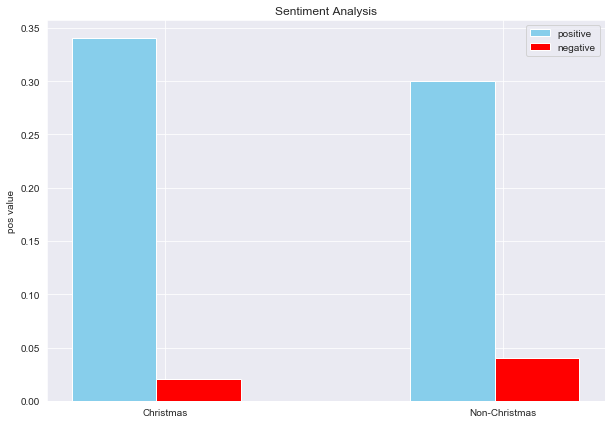

In [25]:
rcParams['figure.figsize'] = 10, 7
sns.set_style("darkgrid")
 
bars1 = [round(sum(pos_list_1)/len(pos_list_1),2),round(sum(pos_list_2)/len(pos_list_2),2)]
bars2 = [round(sum(neg_list_1)/len(neg_list_1),2), round(sum(neg_list_2)/len(neg_list_2),2)]
 
r1 = np.arange(len(bars1))
r2 = [x + 0.25 for x in r1]

plt.bar(r1, bars1, color='skyblue', width=0.25, label='positive')
plt.bar(r2, bars2, color='red', width=0.25, label='negative')

plt.xticks([r +0.15 for r in range(len(bars1))], ['Christmas', 'Non-Christmas'])
plt.ylabel("pos value")
plt.title("Sentiment Analysis")
plt.legend()
plt.savefig("graphs/Sentiment_Analysis.png")
plt.show()

## Visuals

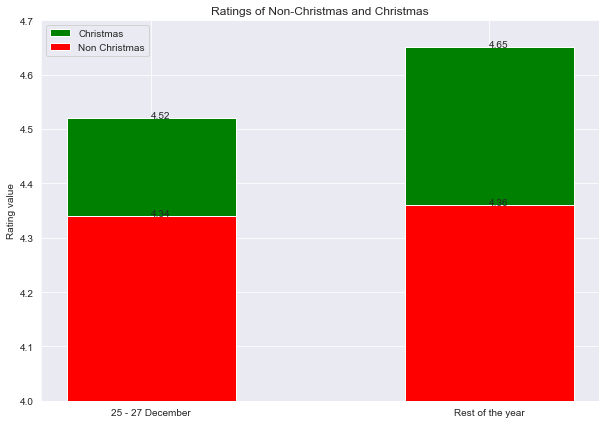

In [26]:
rcParams['figure.figsize'] = 10, 7
sns.set_style("darkgrid")

names = ['25 - 27 December', 'Rest of the year']

values = [ round(sum(actually_december) / float(len(actually_december)), 2), 
          round(sum(not_december) / float(len(not_december)), 2)]


plt.subplot(111)
plt.bar(names,values, width=0.5, color='g', label = "Christmas") 
plt.ylim(4, 4.7)

values2 = [ round(sum(actually_december2) / float(len(actually_december2)), 2), 
          round(sum(not_december2) / float(len(not_december2)), 2)]

plt.bar(names,values2, width=0.5, color='r', label = "Non Christmas") 

for a, b in zip(names, values):
    plt.text(a, b, str(b))

for a, b in zip(names, values2):
    plt.text(a, b, str(b))

plt.ylabel("Rating value")
plt.title("Ratings of Non-Christmas and Christmas")
plt.legend()
plt.savefig('graphs/ratings_non_vs_chr.png')
plt.show()


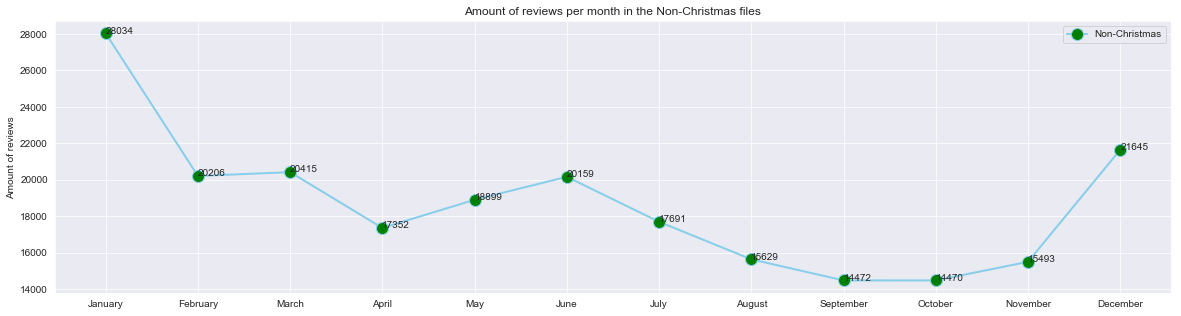

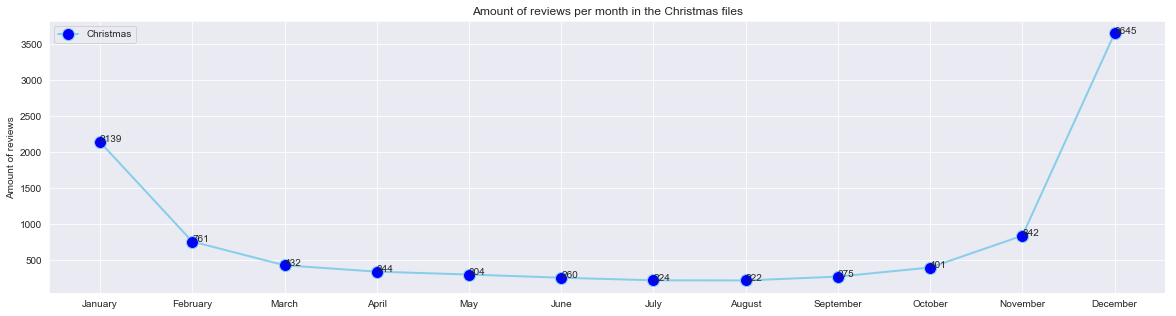

In [34]:
rcParams['figure.figsize'] = 20, 5

names = [ 'January', 'February', 'March', 'April', 'May', 'June',
         'July', 'August', 'September', 'October', 'November', 'December']
year_values_non = [ len(january1), len(february1), len(march1), 
               len(april1), len(may1), len(june1),len(july1), 
               len(august1), len(september1), len(october1),
               len(november1), len(december1) ]
year_values_chr = [ len(january), len(february), len(march), 
               len(april), len(may), len(june),len(july), 
               len(august), len(september), len(october),
               len(november), len(december) ]

plt.plot( names, year_values_non, marker='o', markerfacecolor='green', markersize=12, color='skyblue', linewidth=2, label="Non-Christmas")


for a, b in zip(names, year_values_non):
    plt.text(a, b, str(b))

plt.ylabel("Amount of reviews")
plt.title("Amount of reviews per month in the Non-Christmas files")
plt.legend()
plt.savefig("graphs/Amount_reviews_month1.png")
plt.show()

plt.plot( names, year_values_chr, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=2, label="Christmas")

for a, b in zip(names, year_values_chr):
    plt.text(a, b, str(b))

plt.ylabel("Amount of reviews")
plt.title("Amount of reviews per month in the Christmas files")
plt.legend()
plt.savefig("graphs/Amount_reviews_month2.png")
plt.show()

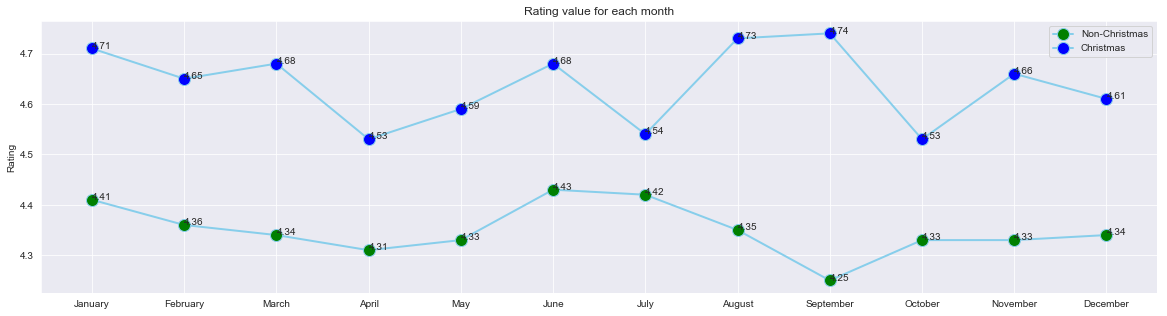

In [28]:
rcParams['figure.figsize'] = 20, 5

names = [ 'January', 'February', 'March', 'April', 'May', 'June',
         'July', 'August', 'September', 'October', 'November', 'December']
year_values_non_ra = [ round(sum(january1)/len(january1), 2), round(sum(february1)/len(february1), 2), 
                      round(sum(march1)/len(march1), 2), round(sum(april1)/len(april1), 2), 
                      round(sum(may1)/len(may1), 2), round(sum(june1)/len(june1), 2), round(sum(july1)/len(july1), 2), 
               round(sum(august1)/len(august1), 2), round(sum(september1)/len(september1), 2), round(sum(october1)/len(october1), 2),
               round(sum(november1)/len(november1), 2), round(sum(december1)/len(december1), 2) ]

year_values_chr_ra = [ round(sum(january)/len(january), 2), round(sum(february)/len(february), 2), 
                      round(sum(march)/len(march), 2), round(sum(april)/len(april), 2), 
                      round(sum(may)/len(may), 2), round(sum(june)/len(june), 2), round(sum(july)/len(july), 2), 
               round(sum(august)/len(august), 2), round(sum(september)/len(september), 2), round(sum(october)/len(october), 2),
               round(sum(november)/len(november), 2), round(sum(december)/len(december), 2) ]

plt.plot( names, year_values_non_ra, marker='o', markerfacecolor='green', markersize=12, color='skyblue', linewidth=2, label="Non-Christmas")
plt.plot( names, year_values_chr_ra, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=2, label="Christmas")

for a, b in zip(names, year_values_non_ra):
    plt.text(a, b, str(b))

for a, b in zip(names, year_values_chr_ra):
    plt.text(a, b, str(b))

plt.ylabel("Rating")
plt.title("Rating value for each month")
plt.legend()
plt.savefig("graphs/Rating_value_monthly.png")
plt.show()